# This Script contains the following:
### 1. Importing of Libraries
### 2. Cleaning of Data
### 3. Data Prep - Scatterplot
### 4. Reshape the Variables
### 5. Split Data into a Training set & Test set
### 6. Regression Analysis
### 7. Checking the Model Performance Stats: MSE & R2
### 8. Compare the Predicted Y Values with actual Y Values in Dataframe

### 1. Importing of Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# define path
path =r"C:\Users\repla\Documents"

In [3]:
#Importing Data Set
df = pd.read_csv(r"C:\Users\repla\Documents\Exercise 6\2 - Data\Prepared Data\gun_violence_data_cleaned.csv", index_col = False)

In [4]:
df.head()

,Unnamed: 0,incident_id,date,state,n_participants,n_killed,n_injured,victims,suspects,adult,teen,child,killed,injured,arrested,unharmed
0,0,461105,2013-01-01,Pennsylvania,5.0,0,4,4.0,1.0,True,False,False,False,True,True,False
1,1,460726,2013-01-01,California,5.0,1,3,4.0,1.0,True,False,False,True,True,False,False
2,2,478855,2013-01-01,Ohio,5.0,1,3,3.0,2.0,True,False,False,True,True,True,True
3,3,478925,2013-01-05,Colorado,4.0,4,0,3.0,1.0,True,False,False,True,False,False,False
4,4,478959,2013-01-07,North Carolina,4.0,2,2,3.0,1.0,True,True,False,True,True,False,False


### 2. Cleaning of Data

In [5]:
# Removing more columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,incident_id,date,state,n_participants,n_killed,n_injured,victims,suspects,adult,teen,child,killed,injured,arrested,unharmed
0,461105,2013-01-01,Pennsylvania,5.0,0,4,4.0,1.0,True,False,False,False,True,True,False
1,460726,2013-01-01,California,5.0,1,3,4.0,1.0,True,False,False,True,True,False,False
2,478855,2013-01-01,Ohio,5.0,1,3,3.0,2.0,True,False,False,True,True,True,True
3,478925,2013-01-05,Colorado,4.0,4,0,3.0,1.0,True,False,False,True,False,False,False
4,478959,2013-01-07,North Carolina,4.0,2,2,3.0,1.0,True,True,False,True,True,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186929 entries, 0 to 186928
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   incident_id     186929 non-null  int64  
 1   date            186929 non-null  object 
 2   state           186929 non-null  object 
 3   n_participants  186929 non-null  float64
 4   n_killed        186929 non-null  int64  
 5   n_injured       186929 non-null  int64  
 6   victims         186929 non-null  float64
 7   suspects        186929 non-null  float64
 8   adult           186929 non-null  bool   
 9   teen            186929 non-null  bool   
 10  child           186929 non-null  bool   
 11  killed          186929 non-null  bool   
 12  injured         186929 non-null  bool   
 13  arrested        186929 non-null  bool   
 14  unharmed        186929 non-null  bool   
dtypes: bool(7), float64(3), int64(3), object(2)
memory usage: 12.7+ MB


In [8]:
# Convert a specific column from float64 to int64
df['n_participants'] = df['n_participants'].astype('int64')
df['victims'] = df['victims'].astype('int64')
df['suspects'] = df['suspects'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186929 entries, 0 to 186928
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   incident_id     186929 non-null  int64 
 1   date            186929 non-null  object
 2   state           186929 non-null  object
 3   n_participants  186929 non-null  int64 
 4   n_killed        186929 non-null  int64 
 5   n_injured       186929 non-null  int64 
 6   victims         186929 non-null  int64 
 7   suspects        186929 non-null  int64 
 8   adult           186929 non-null  bool  
 9   teen            186929 non-null  bool  
 10  child           186929 non-null  bool  
 11  killed          186929 non-null  bool  
 12  injured         186929 non-null  bool  
 13  arrested        186929 non-null  bool  
 14  unharmed        186929 non-null  bool  
dtypes: bool(7), int64(6), object(2)
memory usage: 12.7+ MB


### 3. Data Prep - Scatterplot

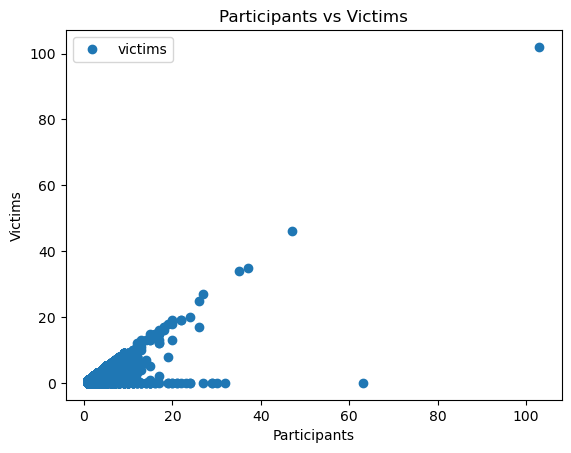

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'n_participants', y='victims',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Participants vs Victims')  
plt.xlabel('Participants')  
plt.ylabel('Victims')  
plt.show()

In [12]:
# 5 - Hypotheses: When the participant count goes up, the victims count will also grow.

### 4. Reshape the Variables

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['n_participants'].values.reshape(-1,1)
y = df['victims'].values.reshape(-1,1)

In [14]:
X

array([[5],
       [5],
       [5],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [16]:
y

array([[4],
       [4],
       [3],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

### 5. Split Data into a training set & test set

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. Regression Analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

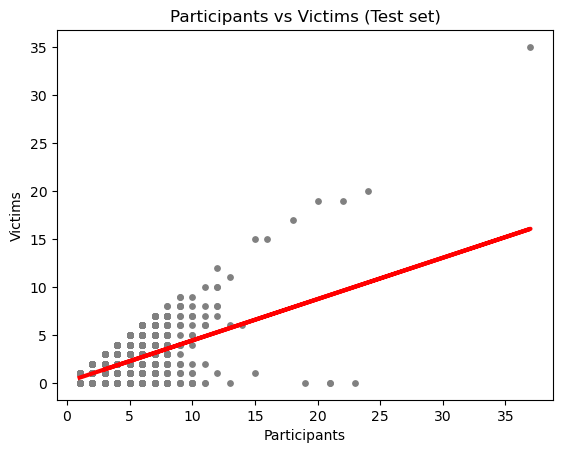

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Participants vs Victims (Test set)')
plot_test.xlabel('Participants')
plot_test.ylabel('Victims')
plot_test.show()

In [22]:
# This regression line appears to fit accurately to what we know about the data.

### 7. Checking the Model Performance Stats: MSE & R2

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43073268]]
Mean squared error:  0.43448031343688287
R2 score:  0.33853833180581894


In [25]:
y_predicted

array([[1.40817124],
       [1.83890393],
       [0.54670588],
       ...,
       [0.54670588],
       [1.83890393],
       [0.54670588]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,1.408171
1,0,1.838904
2,1,0.546706
3,0,0.546706
4,1,0.977439
5,2,0.977439
6,0,0.546706
7,0,0.546706
8,1,0.977439
9,2,1.838904


### 8. Compare the Predicted Y Values with actual Y Values in Dataframe

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43073268]]
Mean squared error:  0.4771036587782545
R2 score:  0.363092293160753


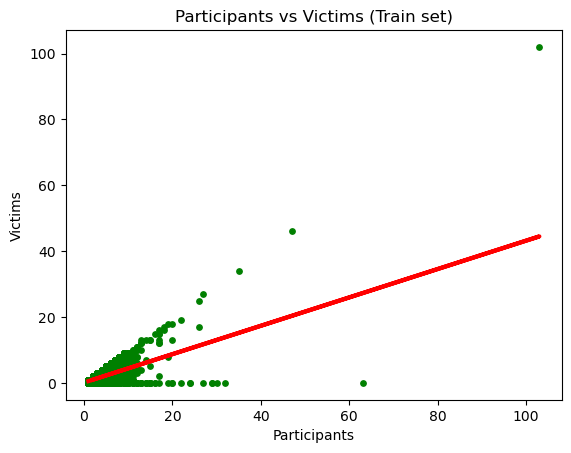

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Participants vs Victims (Train set)')
plot_test.xlabel('Participants')
plot_test.ylabel('Victims')
plot_test.show()

In [31]:
# NOTES
# No additional feedback to add at this time. 

In [32]:
df.to_csv(os.path.join(path, 'Exercise 6', '2 - Data', 'Prepared Data', 'gun_violence_data_cleaned2.csv'))